In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

#import dataset 
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:12].values  #[2,3] pick the columns in that location
y = dataset.iloc[:, 13].values
dataset.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [13]:
#Split the dataset 
from sklearn.model_selection import train_test_split 
train_X , test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [14]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
Scale_X = StandardScaler()
train_X = Scale_X.fit_transform(train_X)
test_X = Scale_X.transform(test_X)

In [15]:
#Use dimensionality reduction - PCA 
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
train_X = pca.fit_transform(train_X)
test_X = pca.transform(test_X)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.37414949, 0.18229115])

In [16]:
#Create, fit and train logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#Making predictions 
predicted_y = logreg.predict(test_X)

In [18]:
#checking the performance of the model 
logreg_pred_test_df = pd.DataFrame({'Expected':test_y, 'Predicted Score':predicted_y })
logreg_pred_test_df.head(20)



,Expected,Predicted Score
0,1,1
1,3,3
2,2,2
3,1,1
4,2,2
5,2,1
6,1,1
7,3,3
8,2,2
9,2,2


In [20]:
#Making confusion matrix 
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(test_y,predicted_y)
con_matrix

array([[13,  1,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

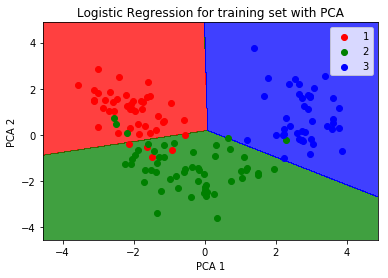

In [21]:
#Visualizing the training set
from matplotlib.colors import ListedColormap
X_set,y_set = train_X, train_y
X1,X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))

plt.contourf(X1,X2, logreg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('red','green','blue'))(i), label = j)
    
plt.title('Logistic Regression for training set with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()